


#Amazon Sales Data & Extract Information About the Sales

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df=pd.read_csv("/content/Amazon Sales data.csv")


In [5]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [6]:
df['Order ID'].nunique()

100

In [7]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [8]:
df.dropna()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [11]:
df['Item Type'].astype("category").value_counts()
df['Country'].astype("category").value_counts()
df['Sales Channel'].astype("category").value_counts()
df['Region'].astype("category").value_counts()
df['Order Priority'].astype("category").value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [12]:
df.insert(loc=6,column='Order Month',value = df['Order Date'].dt.month)
df.insert(loc=7,column='Order Year',value = df['Order Date'].dt.year)
df.insert(loc=11,column='Days to Ship',value = (df['Ship Date'] - df['Order Date']).dt.days)
df.drop(['Order ID'],axis=1,inplace=True)

In [13]:
df.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order Month,Order Year,Ship Date,Units Sold,Days to Ship,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,5,2010,2010-06-27,9925,30,255.28,159.42,2533654.0,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,8,2012,2012-09-15,2804,24,205.70,117.11,576782.8,328376.44,248406.36


In [14]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order Month', 'Order Year', 'Ship Date', 'Units Sold',
       'Days to Ship', 'Unit Price', 'Unit Cost', 'Total Revenue',
       'Total Cost', 'Total Profit'],
      dtype='object')

#Data Visualizaton


In [15]:
df[['Units Sold', 'Days to Ship', 'Unit Price', 'Unit Cost','Total Revenue', 'Total Cost', 'Total Profit']].describe().T

,count,mean,std,min,25%,50%,75%,max
Units Sold,100.0,5.128710e+03,2.794485e+03,124.00,2836.2500,5382.500,7.369000e+03,9925.00
Days to Ship,100.0,2.336000e+01,1.474259e+01,0.00,9.7500,23.500,3.625000e+01,50.00
Unit Price,100.0,2.767613e+02,2.355922e+02,9.33,81.7300,179.880,4.372000e+02,668.27
Unit Cost,100.0,1.910480e+02,1.882082e+02,6.92,35.8400,107.275,2.633300e+02,524.96
Total Revenue,100.0,1.373488e+06,1.460029e+06,4870.26,268721.2125,752314.360,2.212045e+06,5997054.98
Total Cost,100.0,9.318057e+05,1.083938e+06,3612.24,168868.0275,363566.385,1.613870e+06,4509793.96
Total Profit,100.0,4.416820e+05,4.385379e+05,1258.02,121443.5850,290767.995,6.358288e+05,1719922.04


In [16]:
df['Order Year'].unique()

array([2010, 2012, 2014, 2013, 2015, 2011, 2017, 2016], dtype=int32)

##Region wise Profit and Revenue

In [17]:
region_wise_revenue = df.groupby('Region')['Total Revenue'].sum()
region_wise_profit = df.groupby('Region')['Total Profit'].sum()
fig=px.bar(df,x=region_wise_revenue.index,y=[region_wise_revenue.values,region_wise_profit.values])
fig.update_layout(barmode='overlay')
fig.update_layout(title='Region wise Revenue and Profit',title_x=0.5,xaxis_title='Region')
fig.update_traces(name='Revenue', selector=dict(name='wide_variable_0'),hovertemplate='Revenue:%{x},%{y}')
fig.update_traces(name='Profit', selector=dict(name='wide_variable_1'),hovertemplate='Profit: %{x},%{y}')
fig.show()


In [18]:
region_wise_revenue = df.groupby('Region')['Total Revenue'].sum()
region_wise_profit = df.groupby('Region')['Total Profit'].sum()
region_wise_revenue_percent = (region_wise_revenue / region_wise_revenue.sum()) * 100
region_wise_profit_percent = (region_wise_profit / region_wise_profit.sum()) * 100
region_wise_df = pd.DataFrame({'Revenue Percent': region_wise_revenue_percent})
region_wise_df.insert(loc=1, column='Profit Percent', value=region_wise_profit_percent)
region_wise_df['Revenue Percent'] = region_wise_df['Revenue Percent'].map('{:.2f}%'.format)
region_wise_df['Profit Percent'] = region_wise_df['Profit Percent'].map('{:.2f}%'.format)
region_wise_df

,Revenue Percent,Profit Percent
Region,,
Asia,15.54%,13.84%
Australia and Oceania,10.26%,10.69%
Central America and the Caribbean,6.68%,6.45%
Europe,24.30%,25.09%
Middle East and North Africa,10.23%,13.04%
North America,4.11%,3.30%
Sub-Saharan Africa,28.88%,27.58%


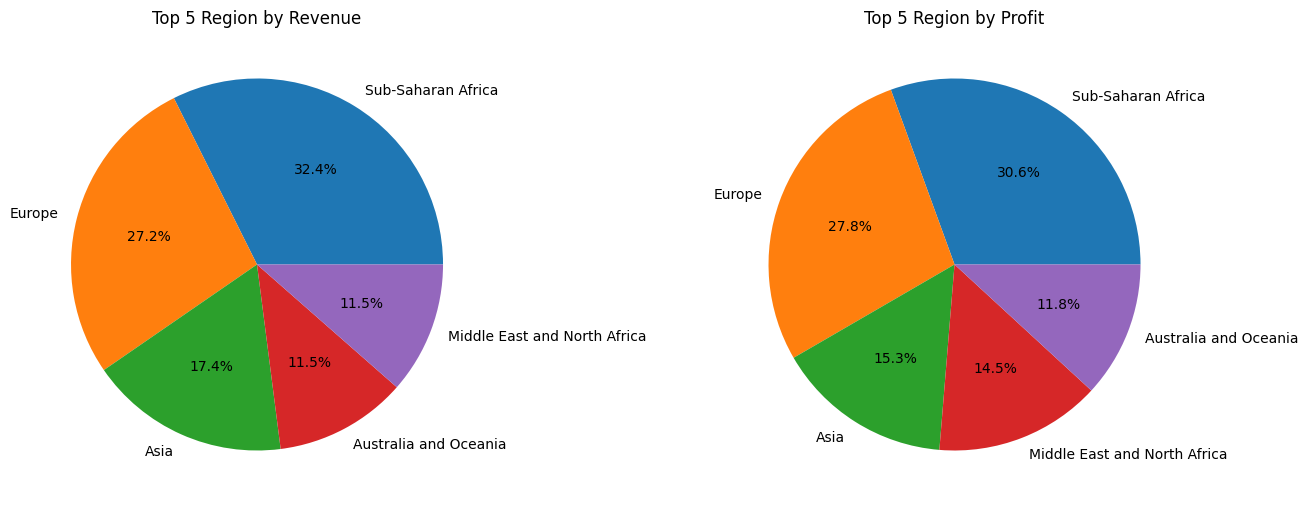

In [19]:
region_by_revenue=region_wise_revenue.nlargest(5)
region_by_profit=region_wise_profit.nlargest(5)
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.pie(region_by_revenue,labels=region_by_revenue.index,autopct='%1.1f%%')
plt.title('Top 5 Region by Revenue')
plt.subplot(1,2,2)
plt.pie(region_by_profit,labels=region_by_profit.index,autopct='%1.1f%%')
plt.title('Top 5 Region by Profit')

plt.subplots_adjust(wspace=0.5)
#plt.axvline(x=0.5, color='black', linewidth=1, linestyle='--')
plt.show()

##Country wise Revenue & Profit

In [20]:
country_wise_revenue = df.groupby('Country')['Total Revenue'].sum()
country_wise_profit = df.groupby('Country')['Total Profit'].sum()
fig=px.bar(df,x=country_wise_revenue.index,y=[country_wise_revenue.values,country_wise_profit.values])
fig.update_layout(barmode='overlay')
fig.update_layout(title='country wise Revenue and Profit',title_x=0.5,xaxis_title='Country',legend_title='trace')
fig.update_traces(name='Revenue', selector=dict(name='wide_variable_0'),hovertemplate='Revenue:%{x},%{y}')
fig.update_traces(name='Profit', selector=dict(name='wide_variable_1'),hovertemplate='Profit:%{x},%{y}')
fig.show()


In [21]:

country_by_revenue= df.groupby('Country')['Total Revenue'].sum()
country_by_profit= df.groupby('Country')['Total Profit'].sum()
t_r=country_by_revenue.sum()
t_p=country_by_profit.sum()
country_by_revenue_percent = ((country_by_revenue / t_r) * 100)
a=pd.DataFrame({'Revenue Percent': country_by_revenue_percent})
country_by_profit_percent = ((country_by_profit / t_p) * 100)
a.insert(loc=1, column='Profit Percent', value=country_by_profit_percent)
top_5_countries_by_profit = a.sort_values(by='Profit Percent', ascending=False).head(5)
top_5_countries_by_profit['Revenue Percent'] = top_5_countries_by_profit['Revenue Percent'].map('{:.2f}%'.format)
top_5_countries_by_profit['Profit Percent'] = top_5_countries_by_profit['Profit Percent'].map('{:.2f}%'.format)

top_5_countries_by_profit


,Revenue Percent,Profit Percent
Country,,
Djibouti,4.41%,5.49%
Myanmar,4.49%,4.08%
Pakistan,3.15%,3.89%
Samoa,3.07%,3.80%
Honduras,4.61%,3.65%


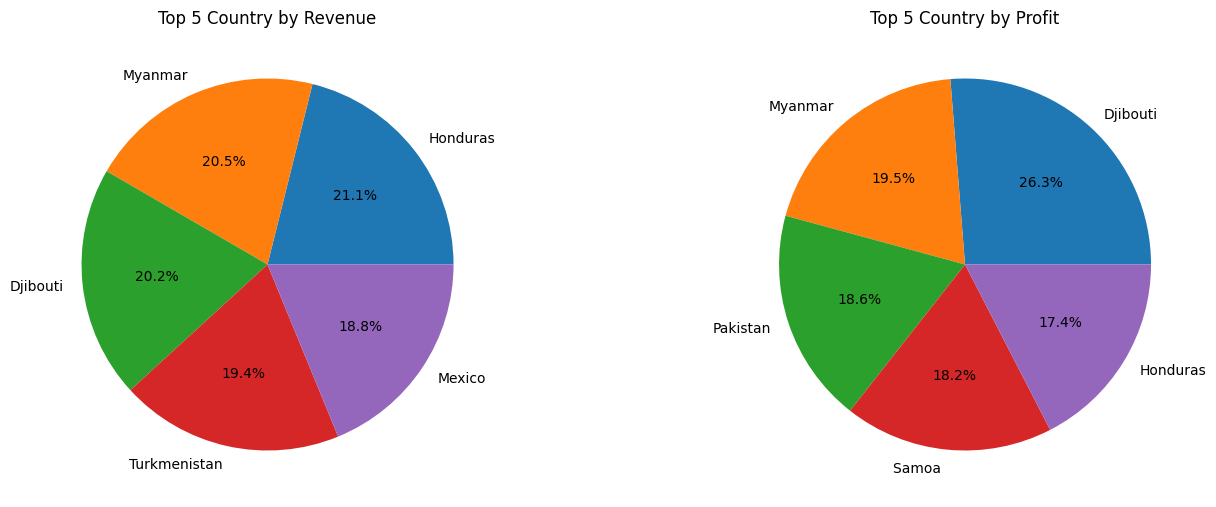

In [22]:
country_by_revenue=country_by_revenue.nlargest(5)
country_by_profit=country_by_profit.nlargest(5)
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.pie(country_by_revenue,labels=country_by_revenue.index,autopct='%1.1f%%')
plt.title('Top 5 Country by Revenue')
plt.subplot(1,2,2)
plt.pie(country_by_profit,labels=country_by_profit.index,autopct='%1.1f%%')
plt.title('Top 5 Country by Profit')

plt.subplots_adjust(wspace=0.5)

plt.show()

In [23]:
country_insigths=df['Country'].unique()
country_insigths

array(['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zamb

In [24]:
len(country_insigths)

76

##Average Profit & Revenue per Year

In [25]:
a=df.groupby('Order Year')['Total Revenue'].mean().reset_index()
b=df.groupby('Order Year')['Total Profit'].mean().reset_index()
merged_df = pd.merge(a, b, on='Order Year')
fig = px.line(merged_df,x='Order Year', y=['Total Revenue', 'Total Profit'],labels={'Order Year': 'Order Year', 'value': 'Average Values'}, markers=True)
fig.update_layout(
    title='Average Revenue and Profit per Year',
    title_x=0.5,
    xaxis_title='Order Year',legend_title='trace')

fig.show()


##Item Type wise total Profit & Revenue

In [26]:
revenue_item=df.groupby('Item Type')['Total Revenue'].sum()
profit_item=df.groupby('Item Type')['Total Profit'].sum()
fig=px.bar(df,x=revenue_item.index,y=[revenue_item.values,profit_item.values])
fig.update_layout(barmode='overlay')
fig.update_layout(title='item type wise Revenue and Profit',title_x=0.5,xaxis_title='Item type')
fig.update_traces(name='Revenue', selector=dict(name='wide_variable_0'),hovertemplate='Revenue:%{x},%{y}')
fig.update_traces(name='Profit', selector=dict(name='wide_variable_1'),hovertemplate='Profit:%{x},%{y}')
fig.show()


##Profit Margin per item type

In [27]:
item_profit_margin = df.groupby('Item Type').apply(lambda x: (x['Total Profit'].sum() / x['Total Revenue'].sum()) * 100)
item_profit_margin_df = item_profit_margin.reset_index(name='Profit Margin (%)')
item_profit_margin_df



,Item Type,Profit Margin (%)
0,Baby Food,37.550924
1,Beverages,33.003161
2,Cereal,43.067574
3,Clothes,67.203514
4,Cosmetics,39.768984
5,Fruits,25.830654
6,Household,24.799856
7,Meat,13.558036
8,Office Supplies,19.386987
9,Personal Care,30.661936


In [28]:
item_profit_margin_df = item_profit_margin.reset_index(name='Profit Margin (%)')

fig = px.bar(item_profit_margin_df, x='Item Type', y='Profit Margin (%)',
             title='Profit Margin by Item Type',
             labels={'Profit Margin (%)': 'Profit Margin (%)'},
             text='Profit Margin (%)')
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', xaxis_title='Item Type', yaxis_title='Profit Margin (%)')
fig.show()

In [29]:
fig=px.pie(item_profit_margin,values=item_profit_margin.values,names=item_profit_margin.index,color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Profit margin Analysis By Item Type',title_font=dict(size=24))
fig.show()


##Sales by Category

In [30]:

a=df.groupby('Item Type')['Total Profit'].sum().reset_index()
b=df.groupby('Item Type')['Total Revenue'].sum().reset_index()
c=pd.merge(a,b,on='Item Type')
c

,Item Type,Total Profit,Total Revenue
0,Baby Food,3886643.70,10350327.60
1,Beverages,888047.28,2690794.60
2,Cereal,2292443.43,5322898.90
3,Clothes,5233334.40,7787292.80
4,Cosmetics,14556048.66,36601509.60
5,Fruits,120495.18,466481.34
6,Household,7412605.71,29889712.29
7,Meat,610610.00,4503675.75
8,Office Supplies,5929583.75,30585380.07
9,Personal Care,1220622.48,3980904.84


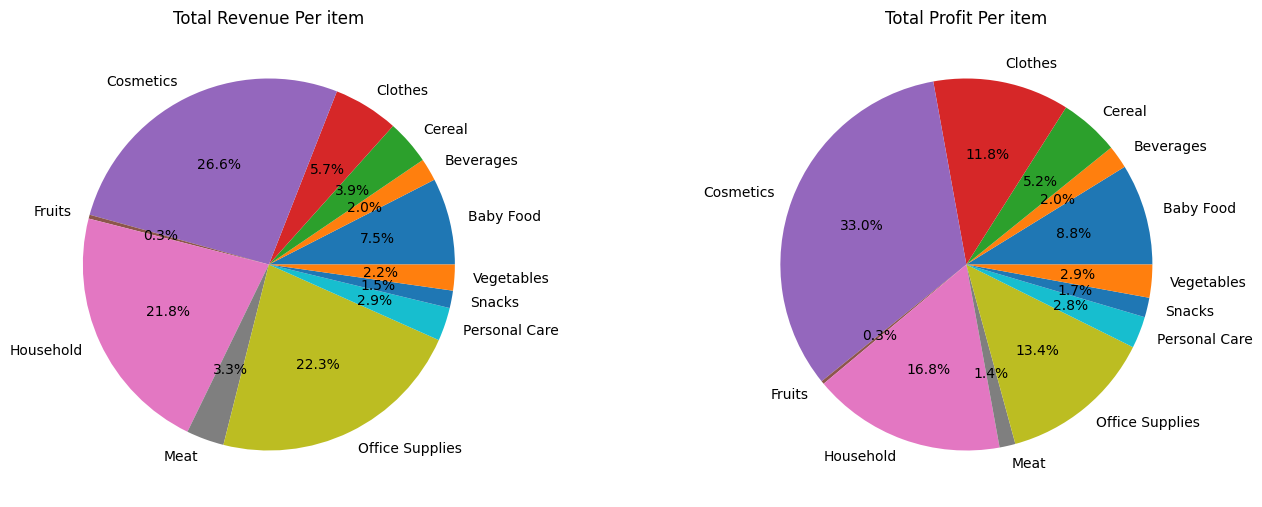

In [31]:
salesbyCategory_revenue=df.groupby('Item Type')['Total Revenue'].sum()
salesbycategory_profit=df.groupby('Item Type')['Total Profit'].sum()

plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.pie(salesbyCategory_revenue,labels=salesbyCategory_revenue.index,autopct='%1.1f%%')
plt.title('Total Revenue Per item')
plt.subplot(1,2,2)
plt.pie(salesbycategory_profit,labels=salesbycategory_profit.index,autopct='%1.1f%%')
plt.title('Total Profit Per item')

plt.subplots_adjust(wspace=0.5)
plt.show()


In [32]:
newcal = df.groupby(['Order Year','Order Month', 'Item Type'])['Units Sold'].sum()
newcal.to_frame()

Units Sold
Order Year Order Month Item Type                
2010       2           Clothes              2269
                       Cosmetics            7234
           5           Baby Food            9925
                       Fruits               5822
           6           Clothes              9905
...                                          ...
2017       2           Snacks               7327
           3           Personal Care        3015
           5           Cereal               8656
                       Cosmetics            1815
                       Personal Care        6409

[93 rows x 1 columns]

In [33]:
fig = px.scatter(df, x="Units Sold", y="Total Profit", color="Item Type",
                 labels={"Units Sold": "Units Sold", "Total Profit": "Total Profit"},
                 title="Scatter Plot of Profit vs Units Sold Of Item Type")
fig.show()

##Monthly Year wise item sold

<ipython-input-34-89027f3f1e78>:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



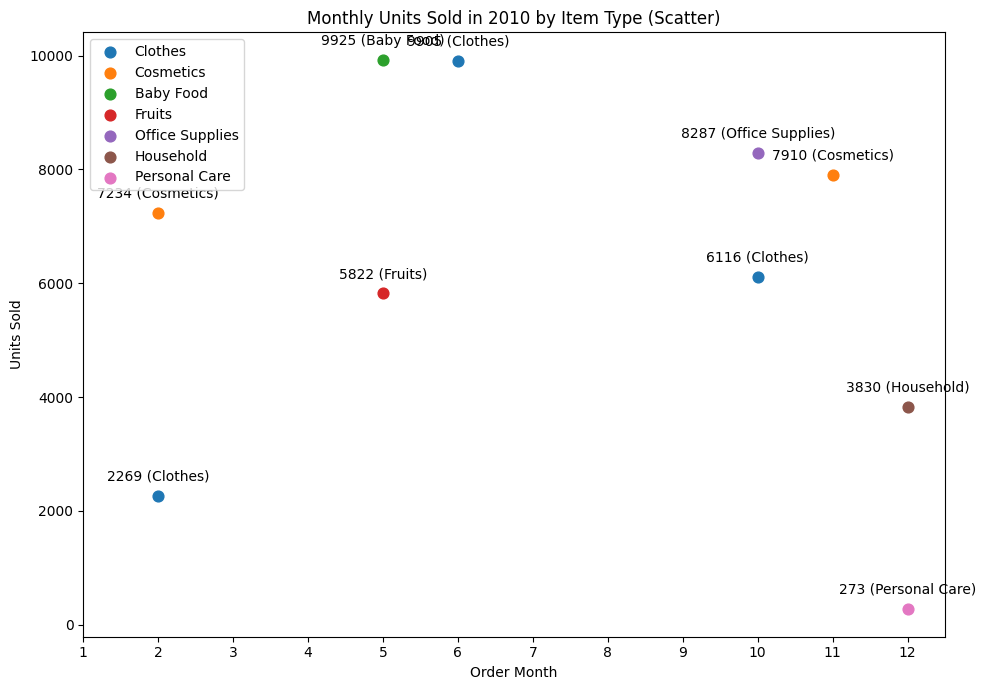

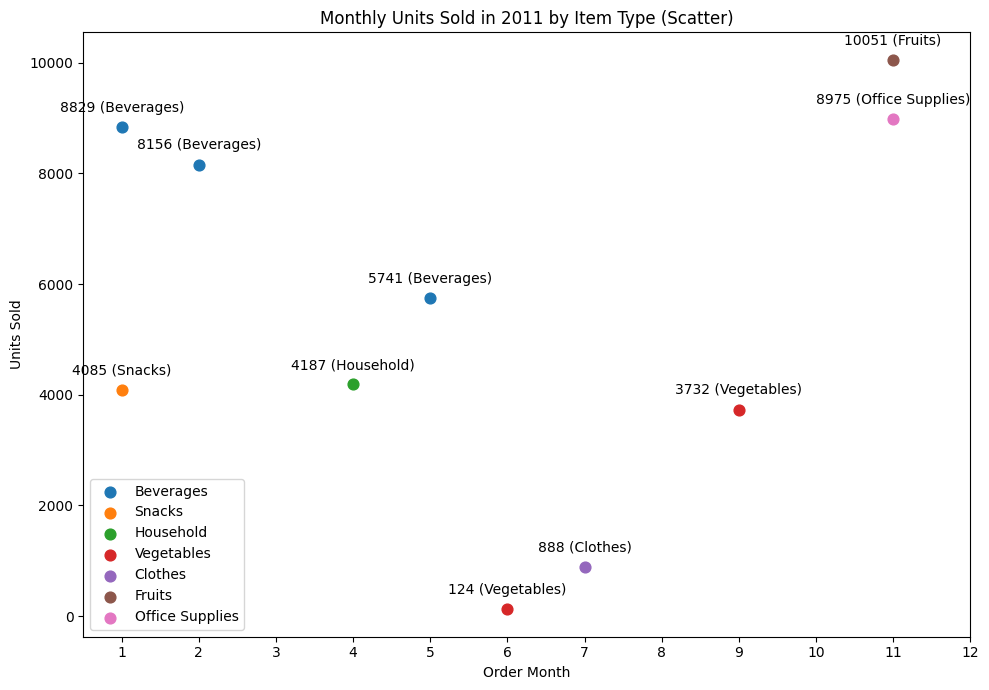

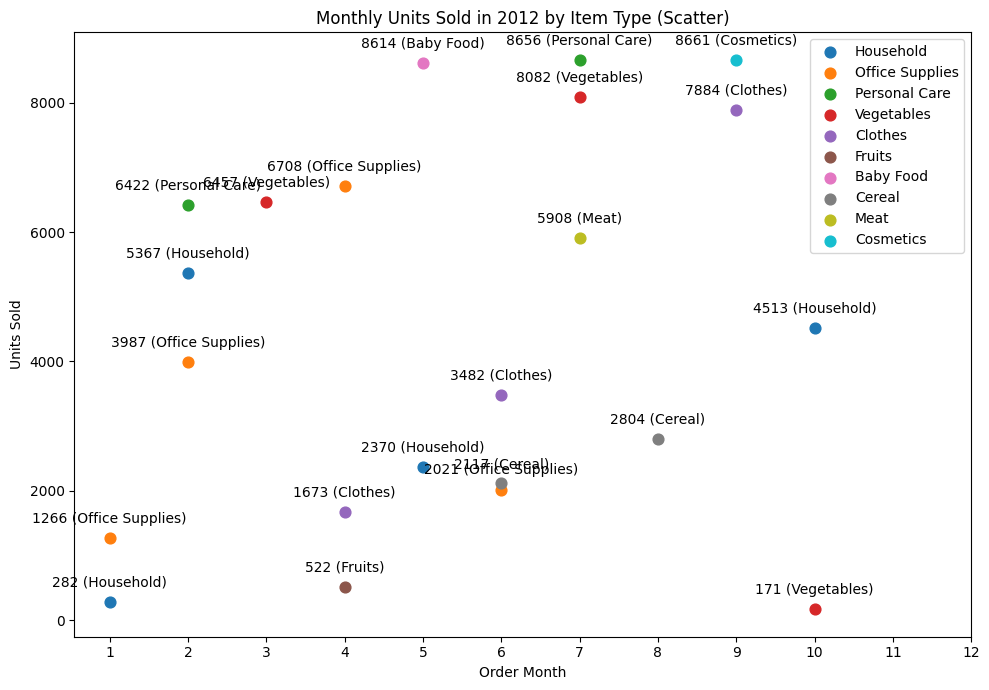

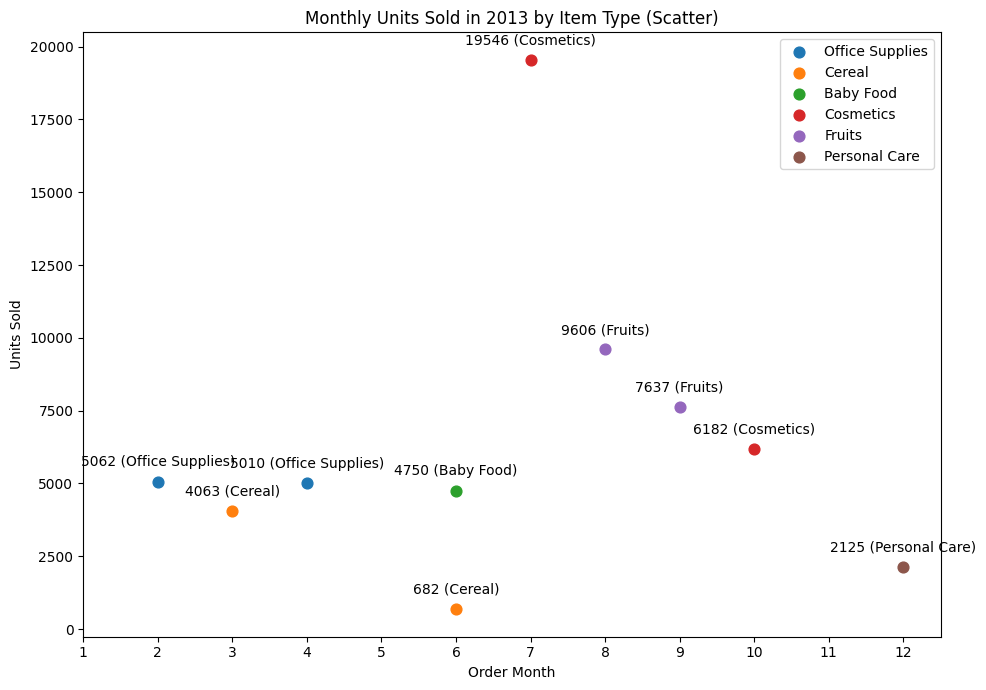

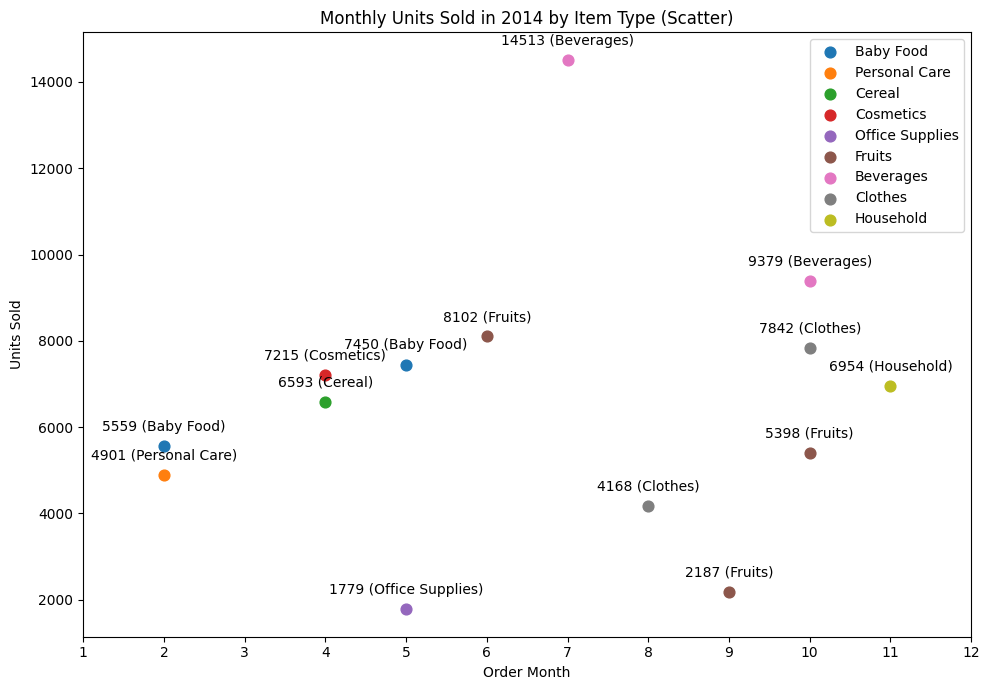

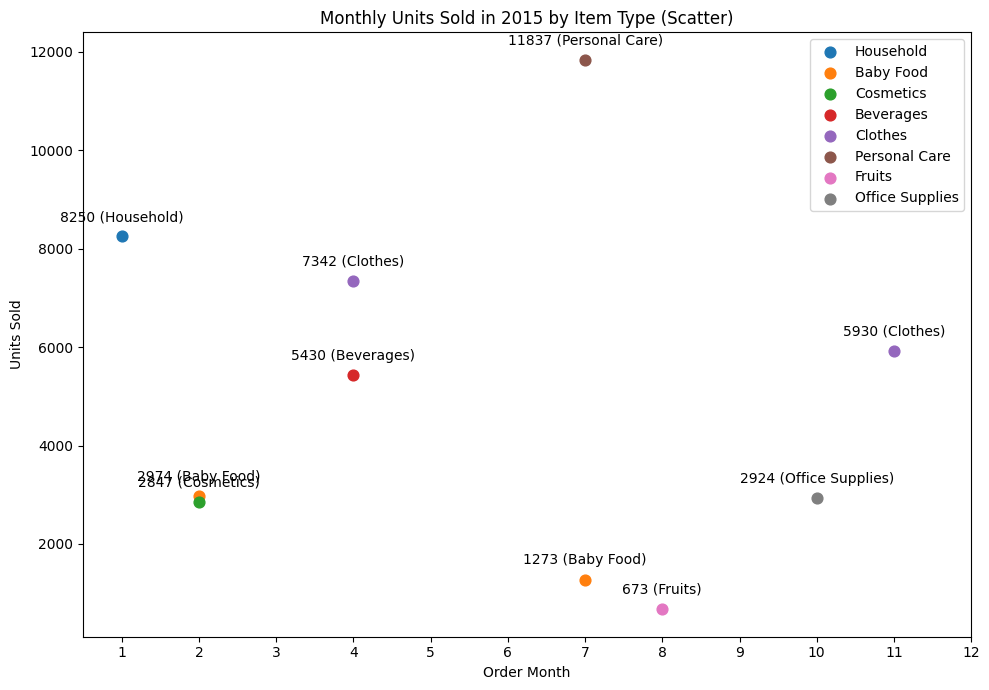

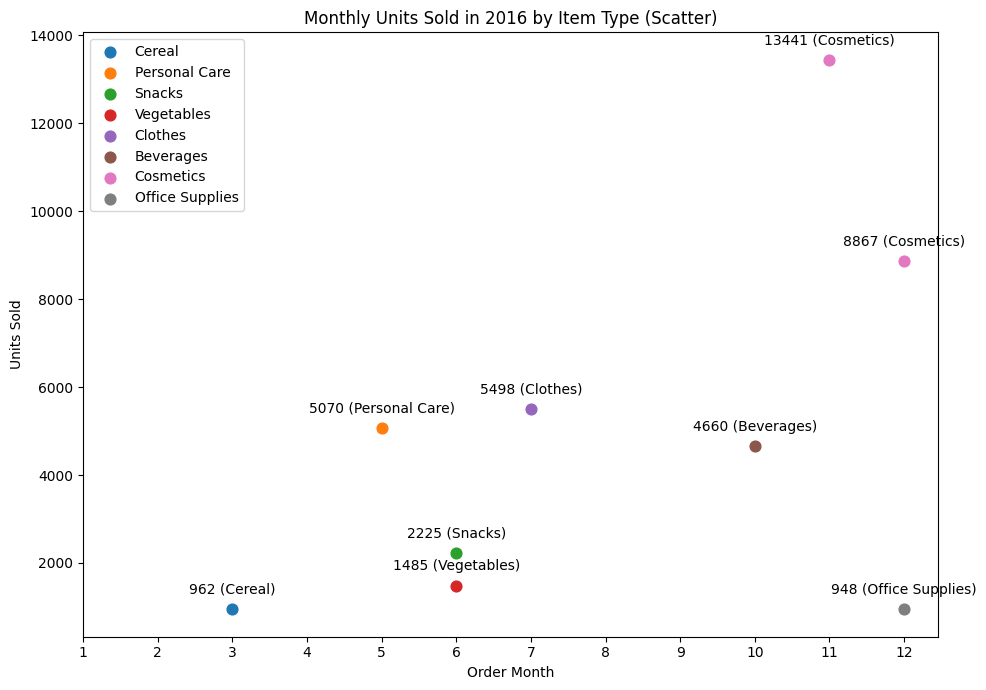

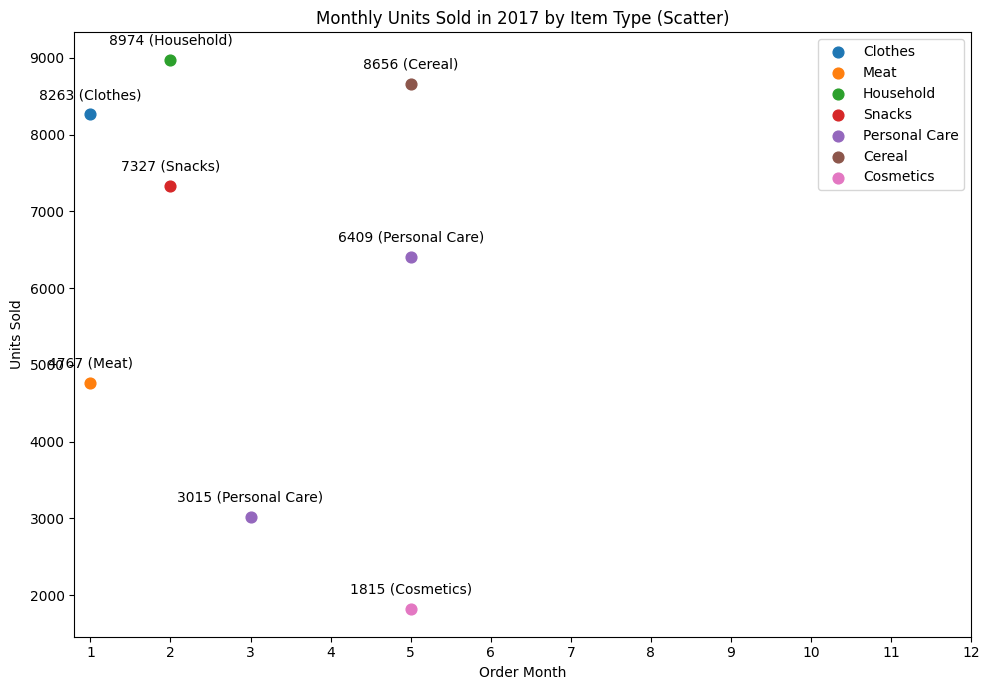

In [34]:

monthly_sales = df.groupby(['Order Year', 'Order Month', 'Item Type'])['Units Sold'].sum().reset_index()

unique_years = monthly_sales['Order Year'].unique()

for year in unique_years:
    year_data = monthly_sales[monthly_sales['Order Year'] == year]

    item_colors = {item: plt.cm.get_cmap('tab10')(i)
                   for i, item in enumerate(year_data['Item Type'].unique())}

    plt.figure(figsize=(10, 7))

    for item_type in year_data['Item Type'].unique():

        item_data = year_data[year_data['Item Type'] == item_type]
        plt.scatter(item_data['Order Month'], item_data['Units Sold'],
                    label=item_type, color=item_colors[item_type], s=60)
        for i, row in item_data.iterrows():
            annotation_text = f"{int(row['Units Sold'])} ({row['Item Type']})"
            plt.annotate(annotation_text, (row['Order Month'], row['Units Sold']),
                         textcoords="offset points", xytext=(0,11), ha='center')

    plt.xlabel('Order Month')
    plt.ylabel('Units Sold')
    plt.title(f'Monthly Units Sold in {year} by Item Type (Scatter)')
    plt.xticks(range(1, 13))
    plt.legend()

    plt.tight_layout()
    plt.show()

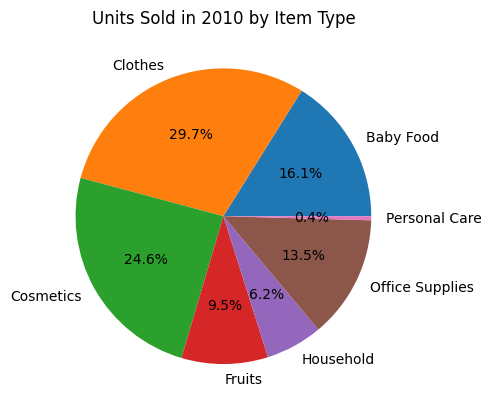

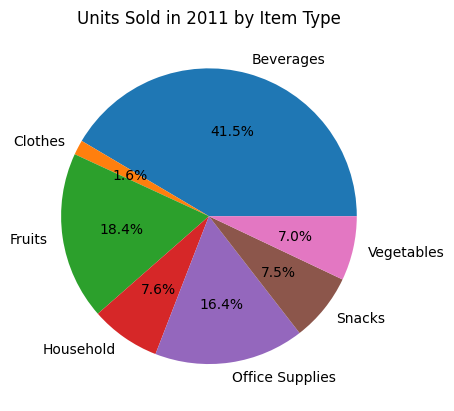

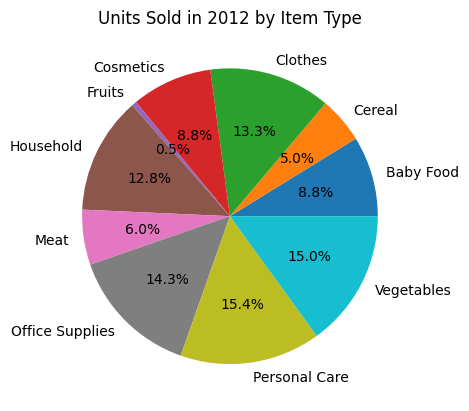

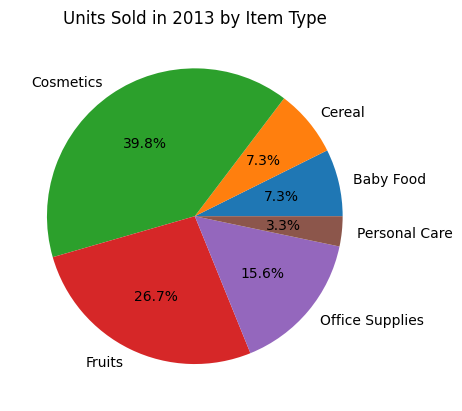

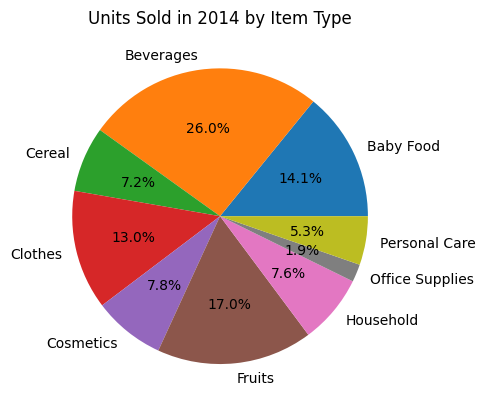

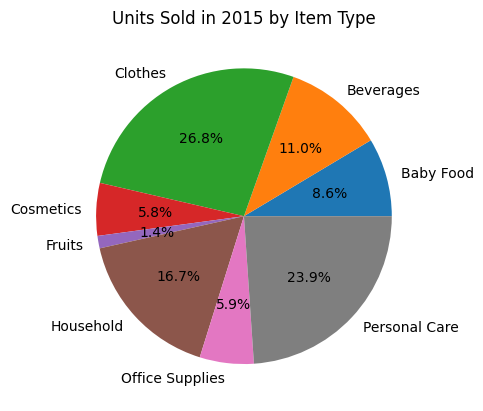

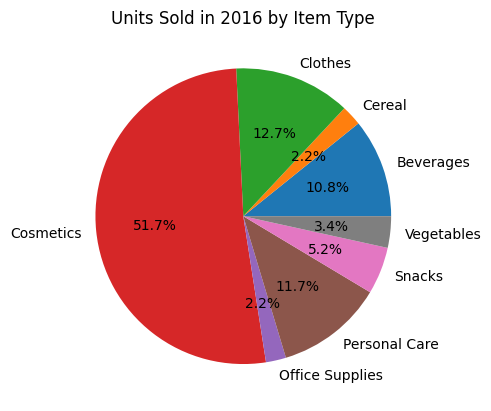

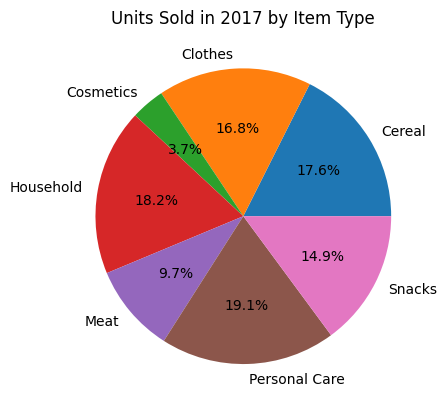

In [35]:

yearly_sales = df.groupby(['Order Year', 'Item Type'])['Units Sold'].sum().reset_index()

unique_years = yearly_sales['Order Year'].unique()


for year in unique_years:
    year_data = yearly_sales[yearly_sales['Order Year'] == year]
    plt.figure()
    plt.pie(year_data['Units Sold'], labels=year_data['Item Type'], autopct='%1.1f%%')
    plt.title(f'Units Sold in {year} by Item Type')
    plt.show()

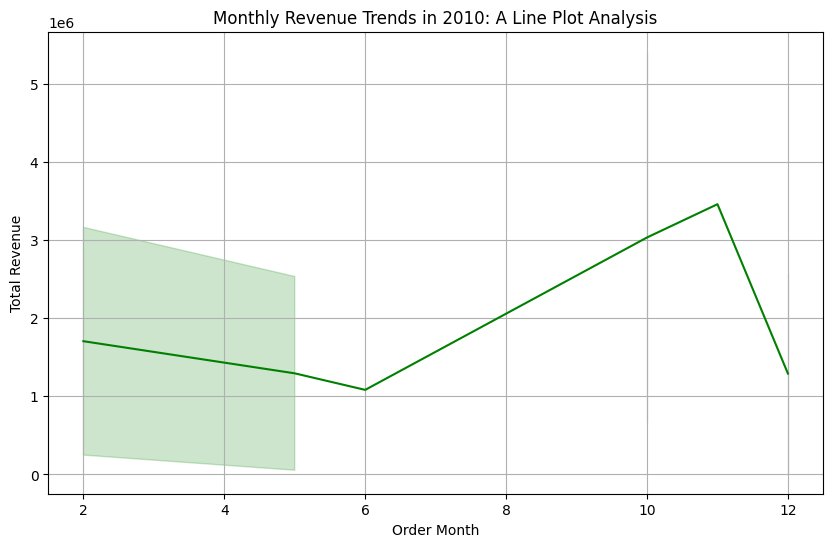

In [36]:
df_2010 = df[df['Order Year']==2010]
plt.figure(figsize=(10,6))
sns.lineplot(data = df_2010, x = df_2010['Order Month'], y = df_2010['Total Revenue'], color = 'green')
plt.grid()
plt.title("Monthly Revenue Trends in 2010: A Line Plot Analysis")
plt.show()

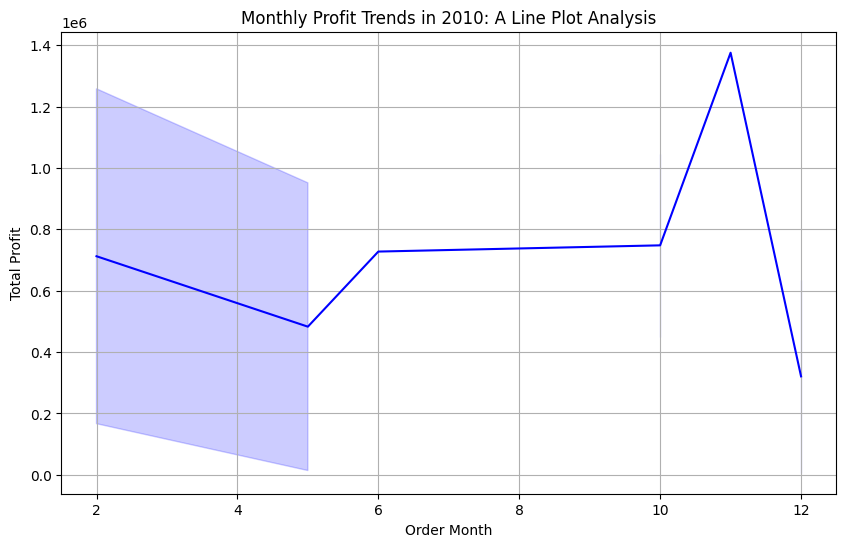

In [37]:
df_2010 = df[df['Order Year']==2010]
plt.figure(figsize=(10,6))
sns.lineplot(data = df_2010, x = df_2010['Order Month'], y = df_2010['Total Profit'], color = 'blue')
plt.grid()
plt.title("Monthly Profit Trends in 2010: A Line Plot Analysis")
plt.show()

In [41]:
import plotly.express as px


fig = px.bar(df, x="Item Type", color="Order Priority", barmode="group",
             title="Grouped Bar Chart of Item Types by Order Priority",
             labels={"Order Priority": "Order Priority", "Item Type": "Item Type", "count": "Count"})
fig.update_layout(xaxis_title="Order Priority", yaxis_title="Count")
fig.show()


In [39]:
pre=df.groupby('Item Type')['Order Priority'].value_counts()
pre

Item Type        Order Priority
Baby Food        H                 3
                 L                 2
                 C                 1
                 M                 1
Beverages        C                 7
                 H                 1
Cereal           H                 5
                 M                 1
                 C                 1
Clothes          C                 4
                 L                 3
                 M                 3
                 H                 3
Cosmetics        H                 8
                 M                 3
                 L                 1
                 C                 1
Fruits           L                 5
                 M                 2
                 H                 2
                 C                 1
Household        L                 5
                 H                 2
                 M                 1
                 C                 1
Meat             M                 1
      